In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
import matplotlib
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
Lisboa = gpd.read_file('Lx/lisboa.shp')

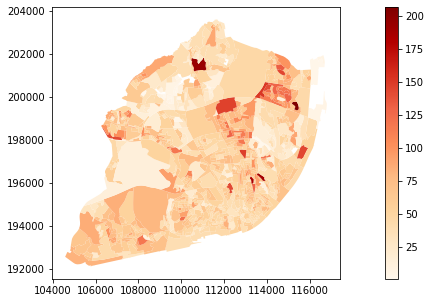

In [3]:
h = Lisboa[(Lisboa.HR65>0) & (Lisboa.MR65>0)].plot(column='HR65', cmap='OrRd',figsize=(16, 5),legend=True,).get_figure()
h.savefig('HR65.jpg')

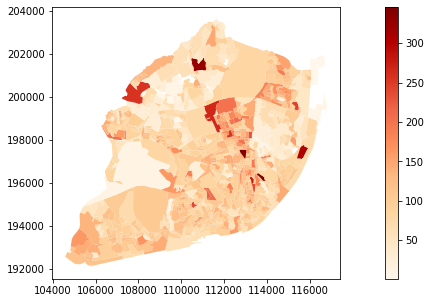

In [4]:
m=Lisboa[(Lisboa.HR65>0) & (Lisboa.MR65>0)].plot(column='MR65', cmap='OrRd',figsize=(16, 5),legend=True,).get_figure()
m.savefig('MR65.jpg')

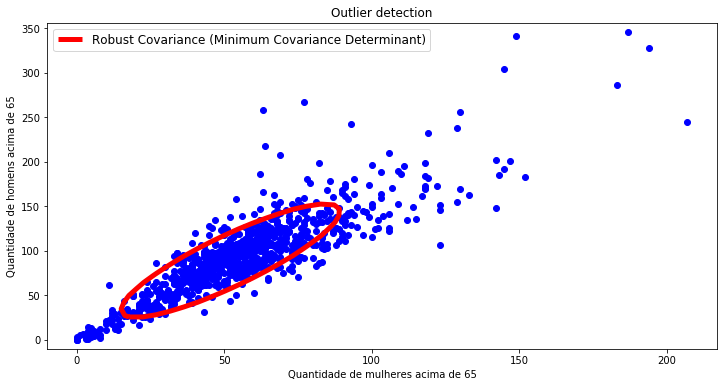

In [5]:
classifiers = {"Robust Covariance (Minimum Covariance Determinant)":EllipticEnvelope(contamination=0.261)}

X1 = Lisboa[['HR65','MR65']].to_numpy()

colors = ['r', 'g']
legend1 = {}

xx1, yy1 = np.meshgrid(np.linspace(Lisboa['HR65'].min()-10,Lisboa['HR65'].max()+10), np.linspace(Lisboa['MR65'].min()-10, Lisboa['MR65'].max()+10))

plt.figure(figsize=(12,6))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    legend1[clf_name] = plt.contour(xx1, yy1, Z1.reshape(xx1.shape), levels=[0], linewidths=5, colors='r')

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

plt.title("Outlier detection")
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='data')
plt.legend((legend1_values_list[0].collections[0],),(legend1_keys_list),
           loc="best", prop=matplotlib.font_manager.FontProperties(size=12))

plt.savefig('outliers2.jpg', dpi=300)
plt.ylabel("Quantidade de homens acima de 65")
plt.xlabel("Quantidade de mulheres acima de 65")
plt.show()

In [6]:
# split data
Lisboa = Lisboa.dropna()
X_train, X_test, y_train, y_test = train_test_split(Lisboa[['E1919', 'E1945', 'E1960', 'E1970',
       'E1980', 'E1985', 'E1990', 'E1995', 'E2001', 'EARG', 'EBAR', 'EORE','EPAT', 'ER',
        'AFCRH', 'AFCRH1_2D', 'AFCRH3_4D', 'I_H', 'J_H','AFCRHARR', 'AFCRHPO', 'AFV',
        'FCD_0', 'FCD_1', 'FCPMA65', 'FCPME15', 'FCR1_2','FCR3_4','NF_1FNC', 'NF_1NNC', 'NF_2FNC', 'NF_2NNC', 'NFF6', 'NGN6',
        'HR0_4', 'HR10_13', 'HR14_19', 'HR15_19', 'HR20_24','HR25_64', 'HR5_9', 'HR65',
        'MR0_4','MR10_13', 'MR14_19', 'MR15_19', 'MR20_24', 'MR25_64', 'MR5_9', 'MR65',
        'IR_D1E', 'IR_DNE', 'IR_EP', 'IR_PR','IR_SAC', 'IR_SP', 'IR_SS', 'IR_ST', 'IRNI_413', 'IRNI_423', 'IRNI_433',
       'IRNI_513', 'IRNI_713', 'IRP_ECR', 'IRP_TCR', 'IRQA_001', 'IRQA_110','IRQA_120', 'IRQA_130', 'IRQA_200', 'IRQA_300',
        'IRQA_400',]], Lisboa['FF_DSG_RES'], test_size=0.40, random_state=70)

# train the model
model = KMeans()
model.fit(X_train, y_train)
model.score(X_train,y_train)

-26005999.771468215

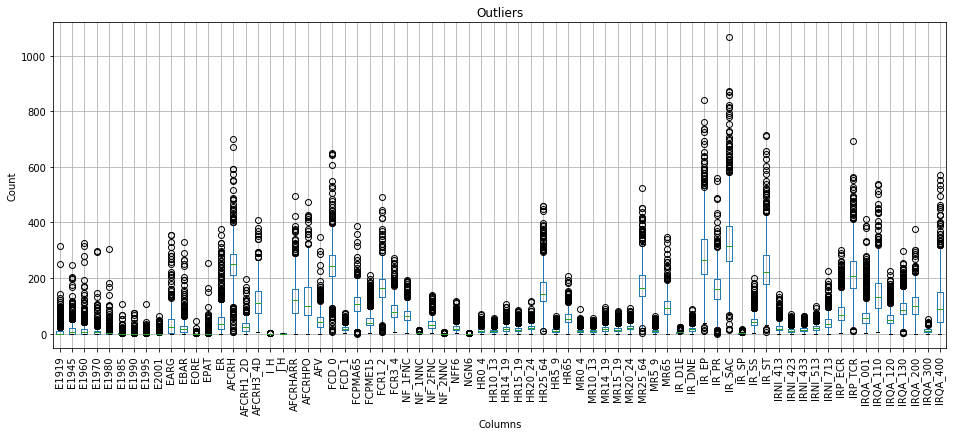

In [7]:
plt.figure(figsize=(16,6))

Lisboa.boxplot(column=['E1919', 'E1945', 'E1960', 'E1970',
       'E1980', 'E1985', 'E1990', 'E1995', 'E2001', 'EARG', 'EBAR', 'EORE','EPAT', 'ER',
        'AFCRH', 'AFCRH1_2D', 'AFCRH3_4D', 'I_H', 'J_H','AFCRHARR', 'AFCRHPO', 'AFV',
        'FCD_0', 'FCD_1', 'FCPMA65', 'FCPME15', 'FCR1_2','FCR3_4','NF_1FNC', 'NF_1NNC', 'NF_2FNC', 'NF_2NNC', 'NFF6', 'NGN6',
        'HR0_4', 'HR10_13', 'HR14_19', 'HR15_19', 'HR20_24','HR25_64', 'HR5_9', 'HR65',
        'MR0_4','MR10_13', 'MR14_19', 'MR15_19', 'MR20_24', 'MR25_64', 'MR5_9', 'MR65',
        'IR_D1E', 'IR_DNE', 'IR_EP', 'IR_PR','IR_SAC', 'IR_SP', 'IR_SS', 'IR_ST', 'IRNI_413', 'IRNI_423', 'IRNI_433',
       'IRNI_513', 'IRNI_713', 'IRP_ECR', 'IRP_TCR', 'IRQA_001', 'IRQA_110','IRQA_120', 'IRQA_130', 'IRQA_200', 'IRQA_300',
        'IRQA_400',], showfliers=True)

plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Outliers")
plt.savefig('outliers.jpg', dpi=300)
plt.show()


In [8]:
columns = ['E1919', 'E1945', 'E1960', 'E1970',
       'E1980', 'E1985', 'E1990', 'E1995', 'E2001', 'EARG', 'EBAR', 'EORE','EPAT', 'ER',
        'AFCRH', 'AFCRH1_2D', 'AFCRH3_4D', 'I_H', 'J_H','AFCRHARR', 'AFCRHPO', 'AFV',
        'FCD_0', 'FCD_1', 'FCPMA65', 'FCPME15', 'FCR1_2','FCR3_4','NF_1FNC', 'NF_1NNC', 'NF_2FNC', 'NF_2NNC', 'NFF6', 'NGN6',
        'HR0_4', 'HR10_13', 'HR14_19', 'HR15_19', 'HR20_24','HR25_64', 'HR5_9', 'HR65',
        'MR0_4','MR10_13', 'MR14_19', 'MR15_19', 'MR20_24', 'MR25_64', 'MR5_9', 'MR65',
        'IR_D1E', 'IR_DNE', 'IR_EP', 'IR_PR','IR_SAC', 'IR_SP', 'IR_SS', 'IR_ST', 'IRNI_413', 'IRNI_423', 'IRNI_433',
       'IRNI_513', 'IRNI_713', 'IRP_ECR', 'IRP_TCR', 'IRQA_001', 'IRQA_110','IRQA_120', 'IRQA_130', 'IRQA_200', 'IRQA_300',
        'IRQA_400']
x = Lisboa[columns].values

import numpy as np
where_are_NaNs = np.isnan(x)
x[where_are_NaNs] = 0

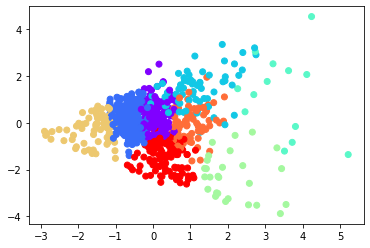

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(x)

result = model.fit_predict(x)
y = pca.fit_transform(x)[:, 1]
x = pca.fit_transform(x)[:, 0]

plt.scatter(x, y,c=result, cmap='rainbow')
plt.savefig('clustering.jpg', dpi=300)

plt.show()